In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score


In [6]:
df= pd.read_csv("Downloads/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
df.duplicated().sum()

0

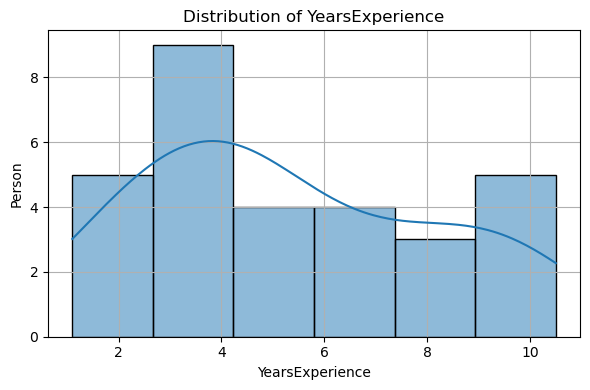

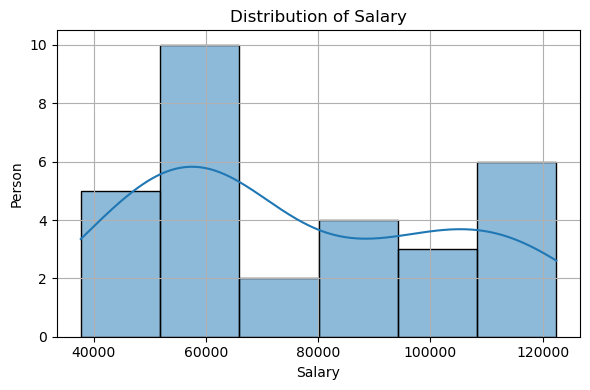

In [20]:
columns =[
    "YearsExperience",
    "Salary"
]

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Person")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
cols =[
    "YearsExperience",
    "Salary"
]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Number of outliers in '{col}': {outliers.shape[0]}")

Number of outliers in 'YearsExperience': 0
Number of outliers in 'Salary': 0


In [26]:
X = df.drop(columns = ['Salary'],axis = 1)
Y = df['Salary']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [30]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score
from sklearn.neighbors import KNeighborsRegressor

In [32]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [40]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train_scale,Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
y_pred = model.predict(X_test_scale)

In [44]:
print(r2_score(Y_test,y_pred))

0.9407212188647607
